# Imports and configs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

# Load data

In [2]:
df = pd.read_csv(r'..\datasets\data\ds_salaries.csv', sep=",", index_col=0)
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download&select=ds_salaries.csv
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1321)

# Data exploration

### General informations about content

In [4]:
df.info()
#Widać, że większość feature'ów będzie kategoryczna a wszystkie kolumny mają jednakową ilość not-nulli

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Text type columns preview

In [6]:
text_columns = df_train.select_dtypes(include=['object'])
for column in text_columns:
    print(f"\n{df_train[column].value_counts()}")



SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

Data Scientist                              109
Data Engineer                               104
Data Analyst                                 86
Machine Learning Engineer                    33
Research Scientist                           14
Data Architect                               10
Machine Learning Scientist                    7
Data Science Manager                          7
Big Data Engineer                             6
Principal Data Scientist                      6
Applied Data Scientist                        5
Computer Vision Engineer                      5
Data Engineering Manager                      5
Data Analytics Manager                        5
Lead Data Engineer                            5
BI Data Analyst                               5
Data Science Consultant                       5
Head of Data                

In [7]:
text_columns_few_categories = ['experience_level', 'employment_type', 'company_size']

for column in text_columns_few_categories:
    print(f"\n{df_train[column].value_counts()}")
    
#Experience:
# EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

#Employment type:
# PT Part-time FT Full-time CT Contract FL Freelance

#Company size:
# S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

M    264
L    154
S     67
Name: company_size, dtype: int64


In [8]:
text_columns_many_categories = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
for column in text_columns_many_categories:
    print(f"\n{df_train[column].value_counts().head()}")


Data Scientist               109
Data Engineer                104
Data Analyst                  86
Machine Learning Engineer     33
Research Scientist            14
Name: job_title, dtype: int64

USD    327
EUR     74
GBP     38
INR     16
CAD     13
Name: salary_currency, dtype: int64

US    272
GB     39
CA     22
IN     18
DE     18
Name: employee_residence, dtype: int64

US    293
GB     40
CA     23
DE     19
IN     15
Name: company_location, dtype: int64


### Numerical columns preview

In [9]:
df_train.describe()

# Remote ratio ranges:
# 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

,work_year,salary,salary_in_usd,remote_ratio
count,485.000000,4.850000e+02,485.000000,485.000000
mean,2021.406186,2.551077e+05,114542.179381,69.793814
std,0.702683,8.753840e+05,72672.826950,41.659268
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.900000e+04,63900.000000,50.000000
50%,2022.000000,1.129000e+05,104702.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,1.100000e+07,600000.000000,100.000000


array([[<AxesSubplot: title={'center': 'work_year'}>,
        <AxesSubplot: title={'center': 'salary'}>],
       [<AxesSubplot: title={'center': 'salary_in_usd'}>,
        <AxesSubplot: title={'center': 'remote_ratio'}>]], dtype=object)

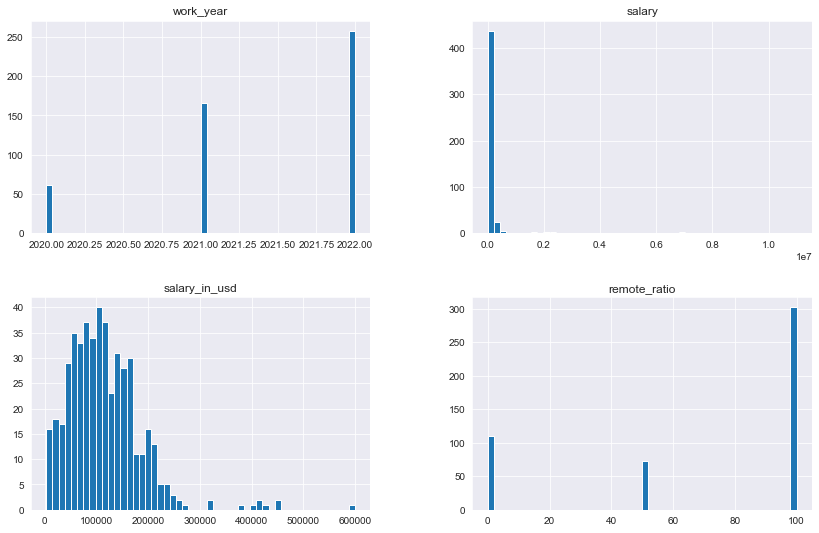

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(14,9)) #Liczba binsów 

Text(0.5, 1.0, 'Dodged histogram')

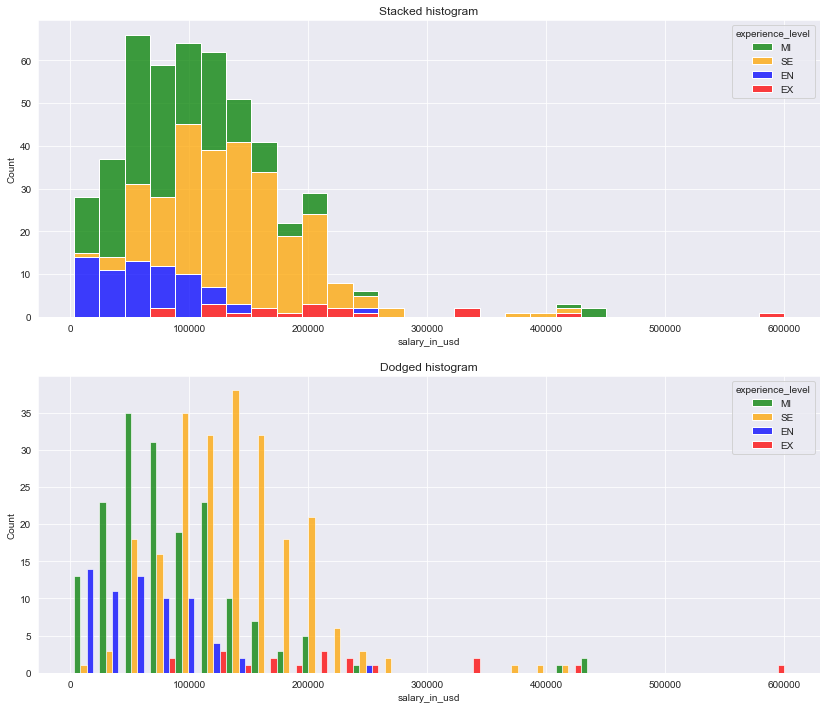

In [11]:
# Define the color palette for the experience levels
palette = {"EN": "blue", "MI": "green", "SE": "orange", "EX": "red"} #Pallete is optional, but i want make colors meaningfulls for myself to analyze

# Create a grid of two subplots, with the first subplot on top and the second one at the bottom
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot the first histogram on the top subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="stack", ax=axs[0], palette=palette)

# Plot the second histogram on the bottom subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="dodge", ax=axs[1], palette=palette)

# Add titles to the subplots
axs[0].set_title("Stacked histogram")
axs[1].set_title("Dodged histogram")



### Analizy wyrabych zmiennych

In [12]:
df_train.columns #Wypisanie kolumn przed wybraniem tych, które nas interesują

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [13]:
df_train = df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']]

In [14]:
corr_matrix = df_train.corr()
corr_matrix

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


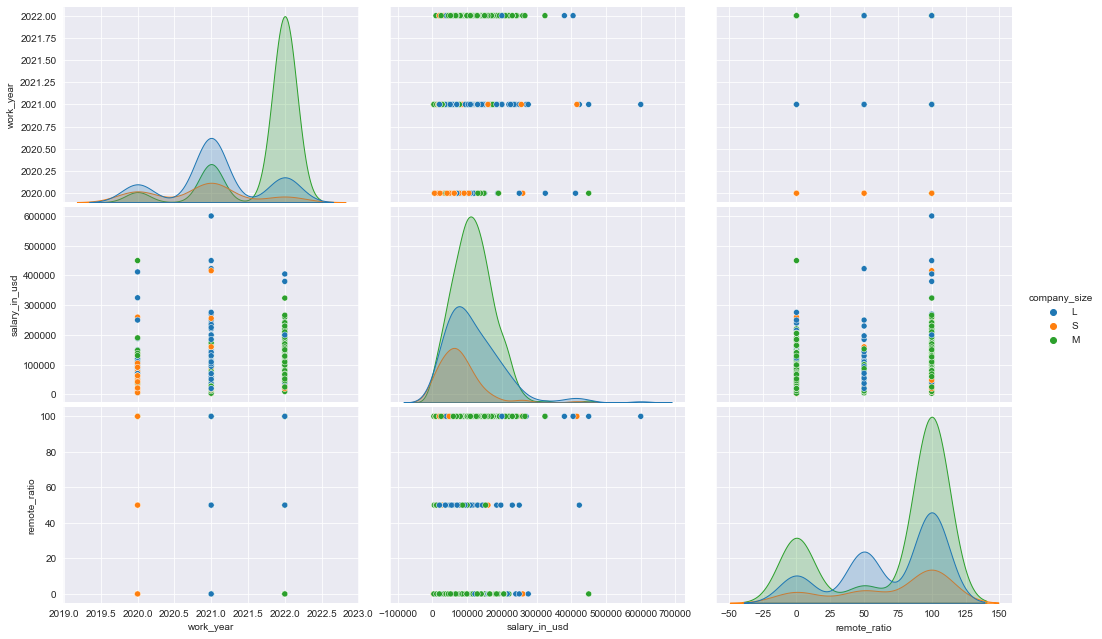

In [15]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='company_size')

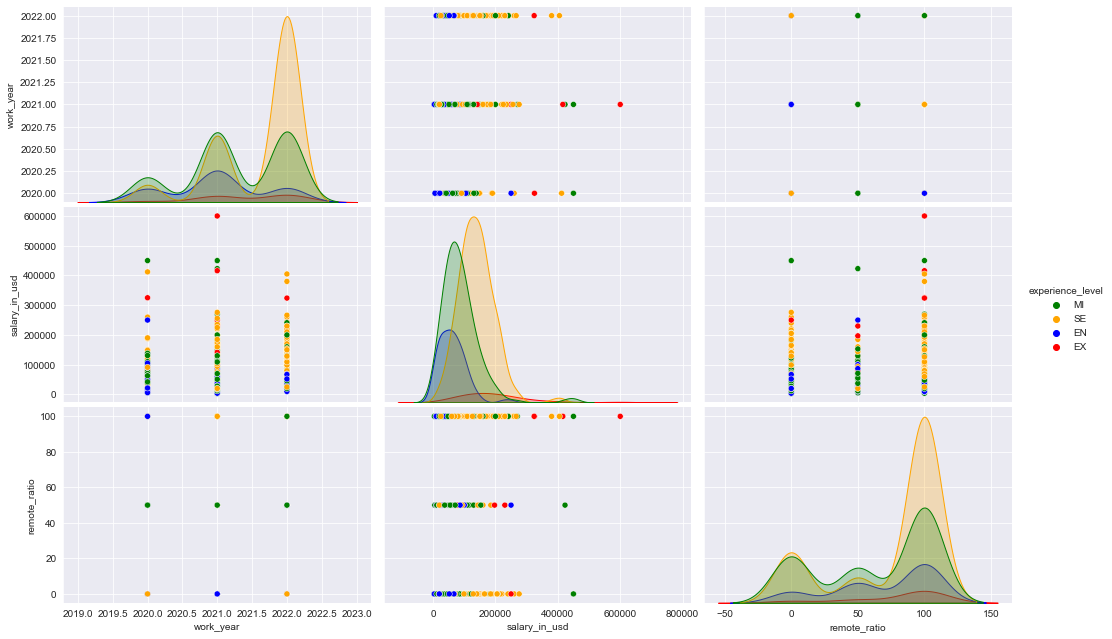

In [16]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='experience_level', palette=palette,)

### Data transformations

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class NewColGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_generate):
        if 'employee_in_company_location' in columns_to_generate:
            self.employee_in_company_location = True
        else:
            self.employee_in_company_location = False

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.employee_in_company_location:
            X['employee_in_company_location'] = (X['employee_residence'] == X['company_location']).astype(int)
        return X

class OneHotEncoderForGivenColumns(BaseEstimator, TransformerMixin):  
    def __init__(self, columns_to_encode=None):
        if columns_to_encode is None:
            self.columns_to_encode = []
        else:
            self.columns_to_encode = columns_to_encode
        self.encoded_columns = None

    def fit(self, X, y=None):
        self.encoded_columns = pd.get_dummies(X, columns=self.columns_to_encode).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X, columns=self.columns_to_encode, dtype=int)
        return X_new.reindex(columns=self.encoded_columns, fill_value=0)


In [18]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output = "pandas")

df_train_transformed_features = df_train.drop('salary_in_usd', axis=1)
df_train_targets = df_train['salary_in_usd']

ct = ColumnTransformer(
    [
        # ('standardscaler', StandardScaler(), ['salary_in_usd']),
        ('minmaxscaler', MinMaxScaler(), ['work_year', 'remote_ratio']),
        ('ohe', OneHotEncoder(sparse_output=False), ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']),
    ],
    remainder='passthrough')


preprocess_pipeline = make_pipeline(
    NewColGenerator(['employee_in_company_location']), #It wasn't workign with column_transformer so i extracted it here
    ct
)

df_train_transformed_features = preprocess_pipeline.fit_transform(df_train_transformed_features)

In [19]:
from joblib import dump, load
dump(preprocess_pipeline, r'..\datasets\joblibs\ds_salaries_pipe.joblib')

['..\\datasets\\joblibs\\ds_salaries_pipe.joblib']

In [20]:
df_train_transformed = df_train_transformed_features.copy()
df_train_transformed['salary_in_usd'] = df_train_targets
df_train_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,79833
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,260000
2,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,109024
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,20000
4,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,150000


In [21]:
dump(df_train_transformed, r'..\datasets\joblibs\ds_salaries_train.joblib')

['..\\datasets\\joblibs\\ds_salaries_train.joblib']

### Data exploration after transofmations

In [22]:
%%capture 
#%%Capture command pregvents cell from printing its output - I screenshoted it and commented so i dont want to have it doubled
print("Features most corelated with target (absoolute value of negative or positive corelation):")
print(abs(df_train_transformed.corr().unstack()).sort_values(ascending=False)['salary_in_usd'].head(8))

print("\n\nFeatures least corelated with target (Probably OHE columns that has only few positive values):")
print(abs(df_train_transformed.corr().unstack()).sort_values(ascending=False)['salary_in_usd'].tail(8)) ;

![](../img/2023-04-18-19-18-42.png)

In [23]:
print("\n\nColeration of all columns (negative correlation has valeus below zeros)")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train_transformed.corr().unstack().sort_values(ascending=False)['salary_in_usd'])



Coleration of all columns (negative correlation has valeus below zeros)
salary_in_usd                                              1.000000
ohe__employee_residence_US                                 0.571803
ohe__company_location_US                                   0.531643
ohe__experience_level_SE                                   0.343513
ohe__experience_level_EX                                   0.259866
ohe__job_title_Principal Data Engineer                     0.214748
minmaxscaler__work_year                                    0.170493
ohe__job_title_Data Analytics Lead                         0.167707
ohe__job_title_Principal Data Scientist                    0.156833
remainder__employee_in_company_location                    0.151817
minmaxscaler__remote_ratio                                 0.132122
ohe__job_title_Financial Data Analyst                      0.131945
ohe__job_title_Director of Data Science                    0.126107
ohe__job_title_Data Architect             

### Using PCA to visualize transformed data
```
This part is mostly for show how it could be done.
That specific dataset is not well fitted to our needs and there won't be many importand things to find out
```

In [24]:
%%capture
# Lets start to check how well features are corelated:
corr = df_train_transformed.corr()
corr.where((abs(corr) != 1)).stack().sort_values()

![](../img/2023-04-18-19-47-40.png)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15) #We want to test more components to get some knowledge about how good specific nubmer of features would describe our data
pca.fit(df_train_transformed_features)
pca.explained_variance_ratio_

array([0.18870155, 0.10622821, 0.07971659, 0.0617774 , 0.05637235,
       0.04705159, 0.04150098, 0.03871439, 0.02943738, 0.02383841,
       0.02219462, 0.02176459, 0.0213826 , 0.01794568, 0.01611487])

In [26]:
(
    sum([0.18870155, 0.10622821, 0.07971659, 0.0617774 , 0.05637235,]), # With using PCA to generate 5 columns we may cover 49% of information
    sum([0.04705159, 0.04150098, 0.03871439, 0.02943738, 0.02383841,]), #Another 5 adds 18%
    sum([0.02219462, 0.02176459, 0.0213826 , 0.01794568, 0.01611487]) # Next 5 is 9% more
)

(0.4927961, 0.18054275, 0.09940236)

In [27]:
pca = PCA(n_components=5) #Lets try with 5 features
pca.fit(df_train_transformed_features)
df_reduced = pca.transform(df_train_transformed_features)
df_reduced_with_targets = df_reduced.copy()
df_reduced_with_targets['salary_in_usd'] = df_train_targets
df_reduced_with_targets

,pca0,pca1,pca2,pca3,pca4,salary_in_usd
0,1.552003,-0.392201,-0.215448,-0.385464,0.840177,79833
1,0.653826,-0.099623,1.106905,-0.055432,0.010351,260000
2,0.287006,0.808606,0.773674,0.489871,0.526218,109024
3,1.341015,0.140103,-0.024762,-0.335462,-0.251084,20000
4,-0.268007,-1.238021,0.263639,0.241546,0.221214,150000
...,...,...,...,...,...,...
602,-1.162586,0.203393,-0.037416,0.572555,-0.186193,154000
603,-1.162586,0.203393,-0.037416,0.572555,-0.186193,126000
604,-1.095130,0.276969,0.146796,-0.106634,0.168260,129000
605,-1.209842,0.199580,0.162215,-0.051885,-0.186529,150000


In [28]:
df_reduced_with_targets.corr()

,pca0,pca1,pca2,pca3,pca4,salary_in_usd
pca0,1.000000e+00,-7.805820e-16,-1.527533e-15,-5.664414e-15,-1.641437e-13,-0.499574
pca1,-7.805820e-16,1.000000e+00,5.568997e-14,1.062437e-13,4.541255e-12,-0.297337
pca2,-1.527533e-15,5.568997e-14,1.000000e+00,1.823776e-12,2.046041e-11,-0.112041
pca3,-5.664414e-15,1.062437e-13,1.823776e-12,1.000000e+00,2.445964e-10,0.051934
pca4,-1.641437e-13,4.541255e-12,2.046041e-11,2.445964e-10,1.000000e+00,0.104855
salary_in_usd,-4.995736e-01,-2.973367e-01,-1.120407e-01,5.193440e-02,1.048548e-01,1.000000


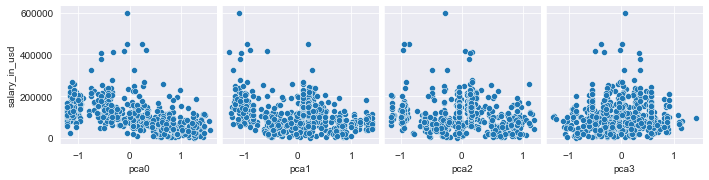

In [29]:
sns.pairplot(df_reduced_with_targets, y_vars='salary_in_usd', x_vars=['pca0','pca1','pca2','pca3'])

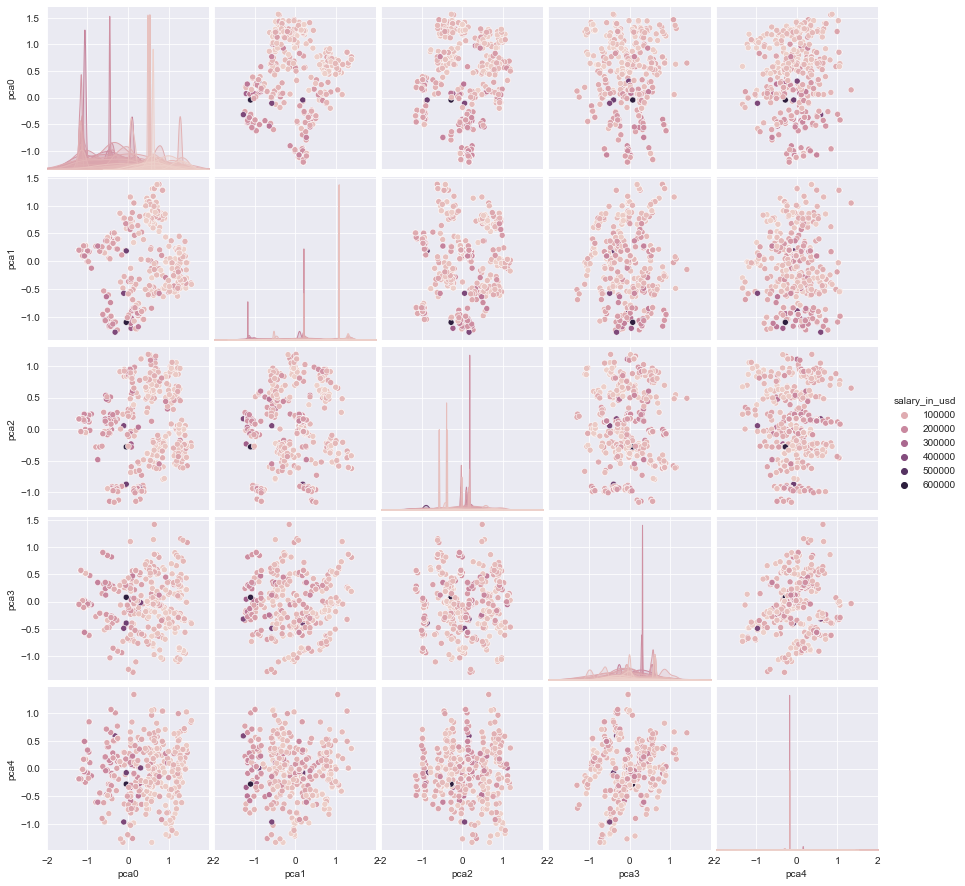

In [30]:
scatterplot = sns.pairplot(df_reduced_with_targets, hue='salary_in_usd')

for ax in scatterplot.axes.flatten():
    ax.set_xlim(-2,2) #Force plots to have maximum X axis = 2 (instead of 4 for some automatic cases)

![](../img/2023-04-18-20-50-01.png)

<AxesSubplot: xlabel='pca4', ylabel='pca1'>

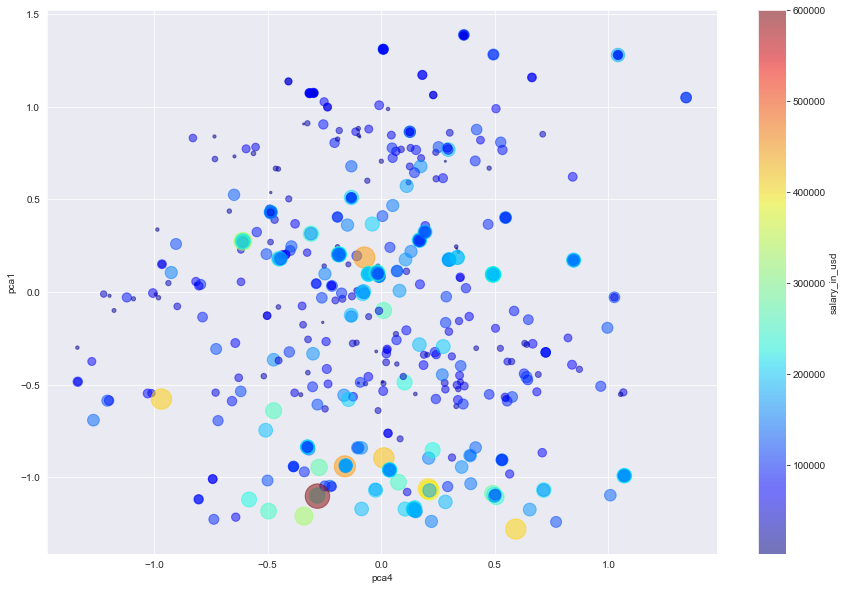

In [31]:
df_reduced_with_targets.plot(kind="scatter", x="pca4", y="pca1", alpha=0.5,
    figsize=(15,10),
    s=df_reduced_with_targets["salary_in_usd"]/1000,
    c="salary_in_usd", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

All of this exploration suggests, that simple models may don't predict our data very well. <br/>
We have very limited nubmer of samples and our data has not clear patterns visible.

### Transforming data for test models

In [32]:
df_test_transformed = df_test.drop('salary_in_usd', axis=1)
df_test_targets = df_test['salary_in_usd']
df_test_transformed = preprocess_pipeline.transform(df_test_transformed)

df_test_transformed['salary_in_usd'] = df_test_targets
df_test_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,78791
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,180000
278,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,20171
191,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,21844
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,91614


In [33]:
dump(df_test_transformed, r'..\datasets\joblibs\ds_salaries_test.joblib')

['..\\datasets\\joblibs\\ds_salaries_test.joblib']

# Some prediction example

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
from sklearn.linear_model import LinearRegression, BayesianRidge, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression':LinearRegression(), 
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=1321), 
    'RandomForestRegressor':RandomForestRegressor(n_estimators=100, random_state=1321), 
    'SVR':SVR(kernel="linear"), 
    'BayesianRidge': BayesianRidge(),
    'Lasso': Lasso(max_iter=50000),
    'ElasticNet': ElasticNet(),
    'Ridge': Ridge(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=1321),
    'SGDRegressor': SGDRegressor(random_state=1321),
    'SVR_rbf': SVR(kernel="rbf"),
    'ExampleNeuralNetwork_with_100_relu_activations': MLPRegressor(random_state=1321, max_iter=10000),
}

In [36]:
for name, model in models.items():

    print(f"{name:22s}:", end="\t")
    model.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
    
    #Training data:
    y_pred = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
    mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred)
    print(f"TRAIN - RMSE: {rmse:.4f};  MAE:{mae:.4f}", end="")

    #Test data
    y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
    mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
    print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

LinearRegression      :	TRAIN - RMSE: 38909.9936;  MAE:25986.1839 | TEST - RMSE: 33256.2373; MAE:22763.4344
DecisionTreeRegressor :	TRAIN - RMSE: 23526.9128;  MAE:12513.5611 | TEST - RMSE: 20936.7875; MAE:10380.0873
RandomForestRegressor :	TRAIN - RMSE: 28533.5656;  MAE:18957.4162 | TEST - RMSE: 24127.5997; MAE:16649.8831
SVR                   :	TRAIN - RMSE: 71601.7154;  MAE:51812.7768 | TEST - RMSE: 62750.7466; MAE:49643.4201
BayesianRidge         :	TRAIN - RMSE: 43260.9331;  MAE:29243.8257 | TEST - RMSE: 33021.4306; MAE:25701.7510
Lasso                 :	TRAIN - RMSE: 38911.4315;  MAE:26031.6356 | TEST - RMSE: 33234.6155; MAE:22840.6979
ElasticNet            :	TRAIN - RMSE: 58113.2329;  MAE:39696.6991 | TEST - RMSE: 46769.8407; MAE:37152.4608
Ridge                 :	TRAIN - RMSE: 40993.0241;  MAE:27902.8399 | TEST - RMSE: 32672.8492; MAE:24379.7046
GradientBoostingRegressor:	TRAIN - RMSE: 36829.9175;  MAE:26698.9251 | TEST - RMSE: 30259.3339; MAE:23789.5111
SGDRegressor          :	T

c:\Users\salamander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


The best models above are DecisionTreeRegressor and RandomForestRegressor
```
MODEL                           RMSE       MAE          RANK_RMSE   RANK_MAE 
'DecisionTreeRegressor':    (20936.7875,10380.0873),        1,          1
'RandomForestRegressor':    (24127.5997,16649.8831),        2,          2
'GradientBoostingRegresson':(30259.3339,23789.5111),        3,          5
'Ridge':                    (32672.8492,24379.7046),        4,          6
```

### Best model analyzes

In [86]:
model = models['DecisionTreeRegressor'] #Model is already fited

# Lest generate predictions once again
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))

#And test if we have the same values that we are expecting
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

 | TEST - RMSE: 20936.7875; MAE:10380.0873


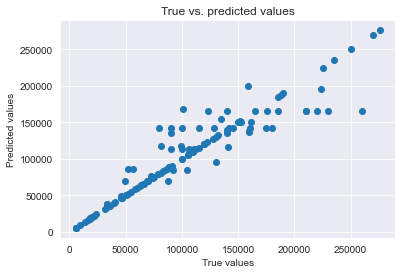

In [87]:
plt.scatter(df_test_transformed['salary_in_usd'], y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs. predicted values')
plt.show()

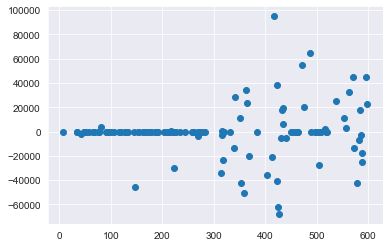

In [88]:
plt.plot(df_test_transformed['salary_in_usd'] - y_pred,marker='o',linestyle='')

Plot above looks weird. <br/>
There is very solid line on which our predictions are almost exactly the same as our target!<br/>
Lets analyze differences

<AxesSubplot: >

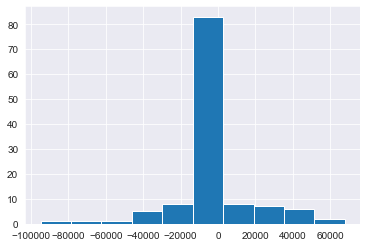

In [39]:
df_pred_vs_target = df_test_transformed[['salary_in_usd']].copy()
df_pred_vs_target['prediction'] = y_pred
df_pred_vs_target['difference'] = df_pred_vs_target['prediction'] - df_pred_vs_target['salary_in_usd'] 
df_pred_vs_target['difference'].hist()

In [40]:
#Lets analyze that little deeper - first of all, we need to mark sessions that we predicted wrong:
df_pred_vs_target['difference_is_zero'] = 0
df_pred_vs_target.loc[df_pred_vs_target.difference == 0, 'difference_is_zero'] = 1
df_pred_vs_target

,salary_in_usd,prediction,difference,difference_is_zero
451,78791,78791.000000,0.000000,1
423,180000,141875.000000,-38125.000000,0
278,20171,20171.000000,0.000000,1
191,21844,21844.000000,0.000000,1
435,91614,85070.000000,-6544.000000,0
...,...,...,...,...
35,74130,74130.000000,0.000000,1
449,21983,21983.000000,0.000000,1
164,130026,130026.000000,0.000000,1
315,165220,165104.545455,-115.454545,0


In [41]:
df_pred_vs_target['difference_is_zero'].mean()
#We have 58% samples predicted perfectly 

0.5819672131147541

In [42]:
df_to_analyze = df_test.copy()
df_to_analyze['perfect_predictions'] = df_pred_vs_target['difference_is_zero']
df_to_analyze

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,perfect_predictions
451,2022,MI,FT,Machine Learning Developer,100000,CAD,78791,CA,100,CA,M,1
423,2022,SE,FT,Data Scientist,180000,USD,180000,US,0,US,M,0
278,2021,SE,FT,Data Scientist,180000,TRY,20171,TR,50,TR,L,1
191,2021,EN,FT,Machine Learning Engineer,21844,USD,21844,CO,50,CO,M,1
435,2022,MI,FT,Data Engineer,70000,GBP,91614,GB,100,GB,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L,1
449,2022,EN,FT,ML Engineer,20000,EUR,21983,PT,100,PT,L,1
164,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M,1
315,2022,SE,FT,Data Scientist,165220,USD,165220,US,100,US,M,0


In [43]:
#To make exploration little faster, without repeating all cells from beggining wiht filtering by our new column, i am exporting data to csv
import csv
df_to_analyze.to_csv("..\datasets\others\df_salaries_test_to_analyze.csv", sep=";", quoting=csv.QUOTE_NONNUMERIC)
#And then will make some analyze in powerbi


There is not visible coleration between wrong predictions and specific fature: 

![](../img/2023-04-18-22-14-24.png)

Now, lets analyze if after transforming data we have some corelation between our features and wrong predictions:

In [44]:
df_to_analyze2 = df_test_transformed.copy()
df_to_analyze2['perfect_predictions'] = df_pred_vs_target['difference_is_zero']
df_to_analyze2

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd,perfect_predictions
451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,78791,1
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,180000,0
278,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,20171,1
191,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,21844,1
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,91614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,74130,1
449,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,21983,1
164,0.5,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,130026,1
315,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,165220,0


In [45]:
corr = df_to_analyze2.corr()['perfect_predictions'].sort_values()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corr.loc[~corr.isna()])

minmaxscaler__work_year                             -0.602552
ohe__company_size_M                                 -0.567822
ohe__employee_residence_US                          -0.462649
ohe__company_location_US                            -0.434858
ohe__experience_level_SE                            -0.344857
salary_in_usd                                       -0.325585
ohe__job_title_Data Analyst                         -0.313410
remainder__employee_in_company_location             -0.305146
ohe__job_title_Data Engineer                        -0.288292
ohe__employee_residence_GB                          -0.243914
ohe__employment_type_FT                             -0.175206
minmaxscaler__remote_ratio                          -0.161870
ohe__company_location_GR                            -0.152324
ohe__company_location_GB                            -0.148186
ohe__job_title_Data Architect                       -0.107263
ohe__job_title_Analytics Engineer                   -0.107263
ohe__emp

As perfect_predictions is has only 2 possible values then ~50% corelation isn't anything weird.
There is not very high value (like 90%+)

In [46]:
# Just making sure that i was not passing salary as feature to training:
[column for column in df_test_transformed.drop('salary_in_usd', axis=1).columns if not 'ohe' in column]

['minmaxscaler__work_year',
 'minmaxscaler__remote_ratio',
 'remainder__employee_in_company_location']

One explanation that i consider for now is assuming, that our targets are not continious number,<br/> 
There may be some some specific discrete values that companies may pay (for example 1k, 2k etc.)<br/>

So, i want to analyze possible salary values that occured in our training dataset

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train['salary_in_usd'].value_counts())

100000    15
120000    12
150000    12
200000    10
135000     9
170000     8
160000     8
140000     8
80000      8
130000     8
90000      6
180000     5
50000      5
105000     5
110000     5
20000      5
210000     5
115000     5
90320      5
60000      5
75000      4
87932      4
165000     4
78526      4
112900     4
85000      4
220000     3
12000      3
54957      3
230000     3
98158      3
205300     3
140400     3
65438      3
155000     3
58000      3
125000     3
76833      3
123000     3
52351      3
88654      3
144000     3
45807      3
32974      3
132320     3
115934     2
76940      2
154600     2
225000     2
209100     2
81666      2
153000     2
65949      2
49461      2
215300     2
78791      2
43966      2
91614      2
69741      2
145000     2
63831      2
102100     2
117789     2
104702     2
99000      2
106260     2
126500     2
39263      2
260000     2
220110     2
160080     2
165400     2
167000     2
109280     2
128875     2
93700      2
185000     2

We can see that there is many of them that ends with "000" - lets mark somehow at least ones divide by 100

In [48]:
df_to_analyze['temp'] = df_to_analyze['salary_in_usd']%100
df_to_analyze['salary_divisible_by_100'] = 1
df_to_analyze.loc[df_to_analyze['temp']>0, 'salary_divisible_by_100'] = 0
df_to_analyze.drop('temp', axis=1, inplace=True)
df_to_analyze['prediction'] = y_pred
df_to_analyze

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,perfect_predictions,salary_divisible_by_100,prediction
451,2022,MI,FT,Machine Learning Developer,100000,CAD,78791,CA,100,CA,M,1,0,78791.000000
423,2022,SE,FT,Data Scientist,180000,USD,180000,US,0,US,M,0,1,141875.000000
278,2021,SE,FT,Data Scientist,180000,TRY,20171,TR,50,TR,L,1,0,20171.000000
191,2021,EN,FT,Machine Learning Engineer,21844,USD,21844,CO,50,CO,M,1,0,21844.000000
435,2022,MI,FT,Data Engineer,70000,GBP,91614,GB,100,GB,M,0,0,85070.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L,1,0,74130.000000
449,2022,EN,FT,ML Engineer,20000,EUR,21983,PT,100,PT,L,1,0,21983.000000
164,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M,1,0,130026.000000
315,2022,SE,FT,Data Scientist,165220,USD,165220,US,100,US,M,0,0,165104.545455


And export once again to look at them in powerbi

In [49]:
#Updating csv after adding new column
df_to_analyze.to_csv("..\datasets\others\df_salaries_test_to_analyze.csv", sep=";", quoting=csv.QUOTE_NONNUMERIC)

![](../img/2023-04-18-23-07-17.png)

In charts above we can see that we have more "perfect predictions" participation in lower salary values <br/>
It is opposite to "salary_divisible_by_100" value, that has larger participation in higher salaries.<br/>

That may suggests that this is not the case that specific values (divided by 100) are easier to predict.<br/>

Another idea may be to assume that we predict perfectly values that our model seen in train dataset, while we are not able to predict anything that was not seen.<br/>

In [73]:
salaries_know_by_model = set(df_train['salary_in_usd'])
salaries_in_test_dataset = set(df_test['salary_in_usd'])

In [60]:
def if_salary_known_by_model(salary, salaries_know_by_model):
    if salary in salaries_know_by_model:
        return 1
    else:
        return 0

In [76]:
df_to_analyze['if_salary_known_by_model'] = df_to_analyze['salary_in_usd'].apply(lambda x: if_salary_known_by_model(x, salaries_know_by_model))
df_to_analyze

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,perfect_predictions,salary_divisible_by_100,prediction,if_salary_known_by_model
451,2022,MI,FT,Machine Learning Developer,100000,CAD,78791,CA,100,CA,M,1,0,78791.000000,1
423,2022,SE,FT,Data Scientist,180000,USD,180000,US,0,US,M,0,1,141875.000000,1
278,2021,SE,FT,Data Scientist,180000,TRY,20171,TR,50,TR,L,1,0,20171.000000,1
191,2021,EN,FT,Machine Learning Engineer,21844,USD,21844,CO,50,CO,M,1,0,21844.000000,1
435,2022,MI,FT,Data Engineer,70000,GBP,91614,GB,100,GB,M,0,0,85070.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L,1,0,74130.000000,1
449,2022,EN,FT,ML Engineer,20000,EUR,21983,PT,100,PT,L,1,0,21983.000000,1
164,2021,EX,FT,Director of Data Science,110000,EUR,130026,DE,50,DE,M,1,0,130026.000000,1
315,2022,SE,FT,Data Scientist,165220,USD,165220,US,100,US,M,0,0,165104.545455,1


In [77]:
df_to_analyze['if_salary_known_by_model'].describe()

count    122.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: if_salary_known_by_model, dtype: float64

In [79]:
#just to make sure it works correctly
for salary in salaries_in_test_dataset:
    if salary not in salaries_know_by_model:
        print(f"{salary} salary is unknown")

### Lets test if linear model will also predict values perfectly with so cases

In [80]:
model = models['LinearRegression'] #Model is already fited

# Lest generate predictions once again
y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))

#And test if we have the same values that we are expecting
mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")


 | TEST - RMSE: 33256.2373; MAE:22763.4344


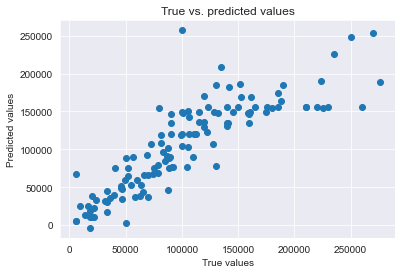

In [81]:
plt.scatter(df_test_transformed['salary_in_usd'], y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs. predicted values')
plt.show()

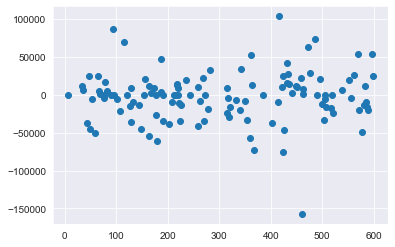

In [83]:
plt.plot(df_test_transformed['salary_in_usd'] - y_pred,marker='o',linestyle='')

This time results looks more like exected - almost all values has some differences between them and target

In [94]:
# Another idea maybe that we are predicting perfectly salaries for samples that hase exactly same parameters as another
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


In [95]:
df.query('salary_in_usd == 90734')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


I didn't filter out them as duplicates previously as because in it is natural that some people in the same company may have exactly the same salary. <br/>
It is natural and if we filter-out them it will decrease their impact on mean salaries what is not wanted by us